# Exercise 3


In [188]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1. Sample Normal/Gaussian distribution (and default histogram command)

(array([   2.,    4.,   12.,   26.,   50.,   71.,  120.,  196.,  330.,
         486.,  628.,  809.,  843.,  968., 1051.,  967.,  918.,  708.,
         586.,  435.,  315.,  206.,  133.,   69.,   33.,   19.,    9.,
           2.,    2.,    2.]),
 array([-14.87137104, -13.84128875, -12.81120646, -11.78112416,
        -10.75104187,  -9.72095958,  -8.69087729,  -7.660795  ,
         -6.63071271,  -5.60063042,  -4.57054812,  -3.54046583,
         -2.51038354,  -1.48030125,  -0.45021896,   0.57986333,
          1.60994562,   2.64002792,   3.67011021,   4.7001925 ,
          5.73027479,   6.76035708,   7.79043937,   8.82052166,
          9.85060396,  10.88068625,  11.91076854,  12.94085083,
         13.97093312,  15.00101541,  16.0310977 ]),
 <BarContainer object of 30 artists>)

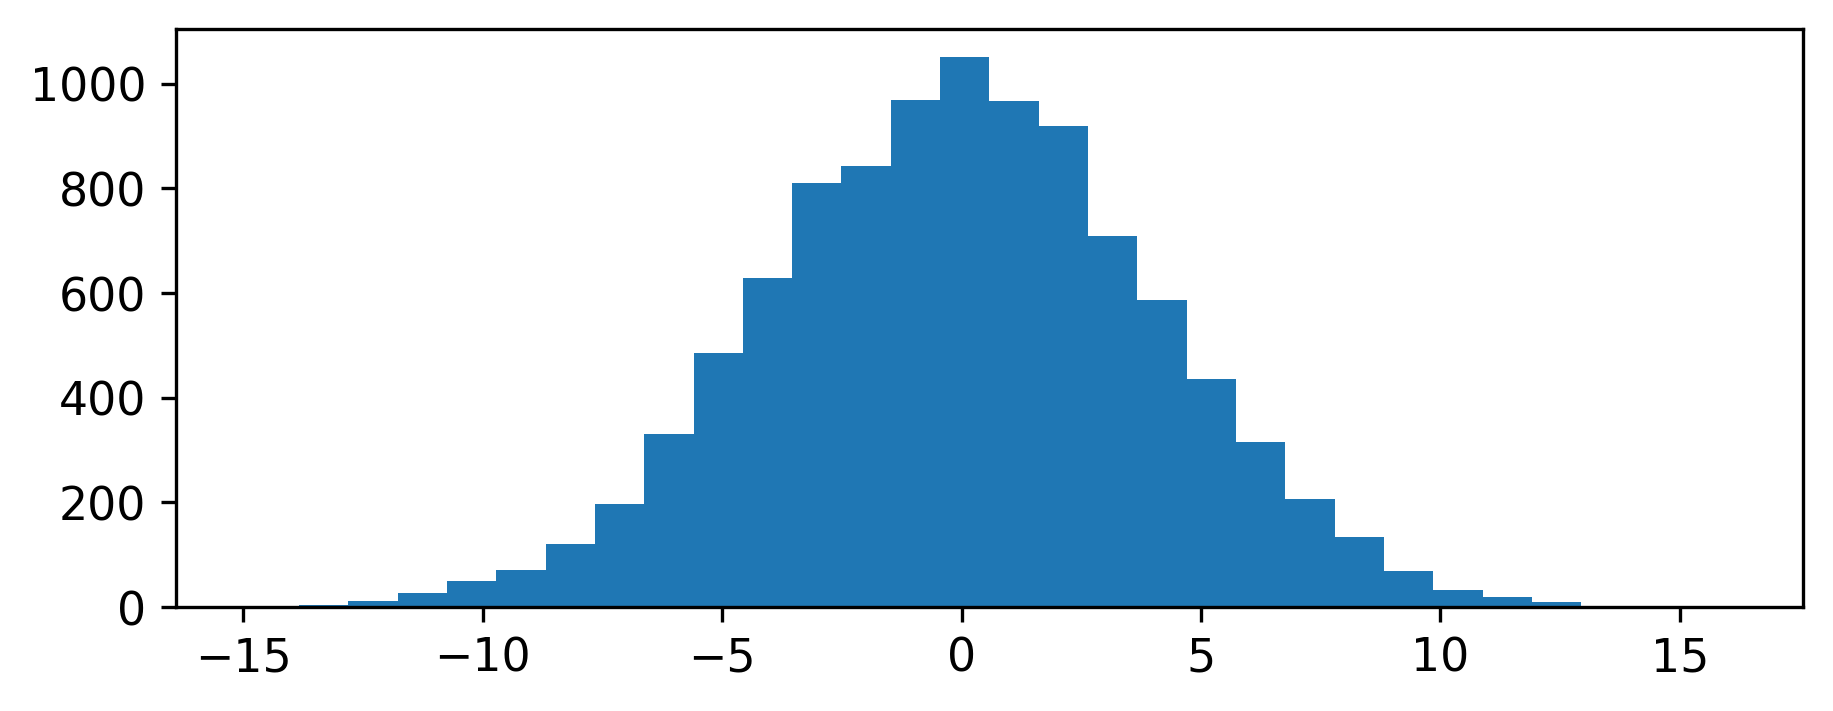

In [189]:
mu, sigma = 0, 4 # mean and standard deviation
X = np.random.normal(mu, sigma, 10000)
plt.hist(X,30) #default histogram plot

### 2. Nicer histograms

In [190]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 300
    
setup_mpl()

In [191]:
min(X), max(X)

(-14.871371038300737, 16.031097703518647)

Text(0, 0.5, 'count')

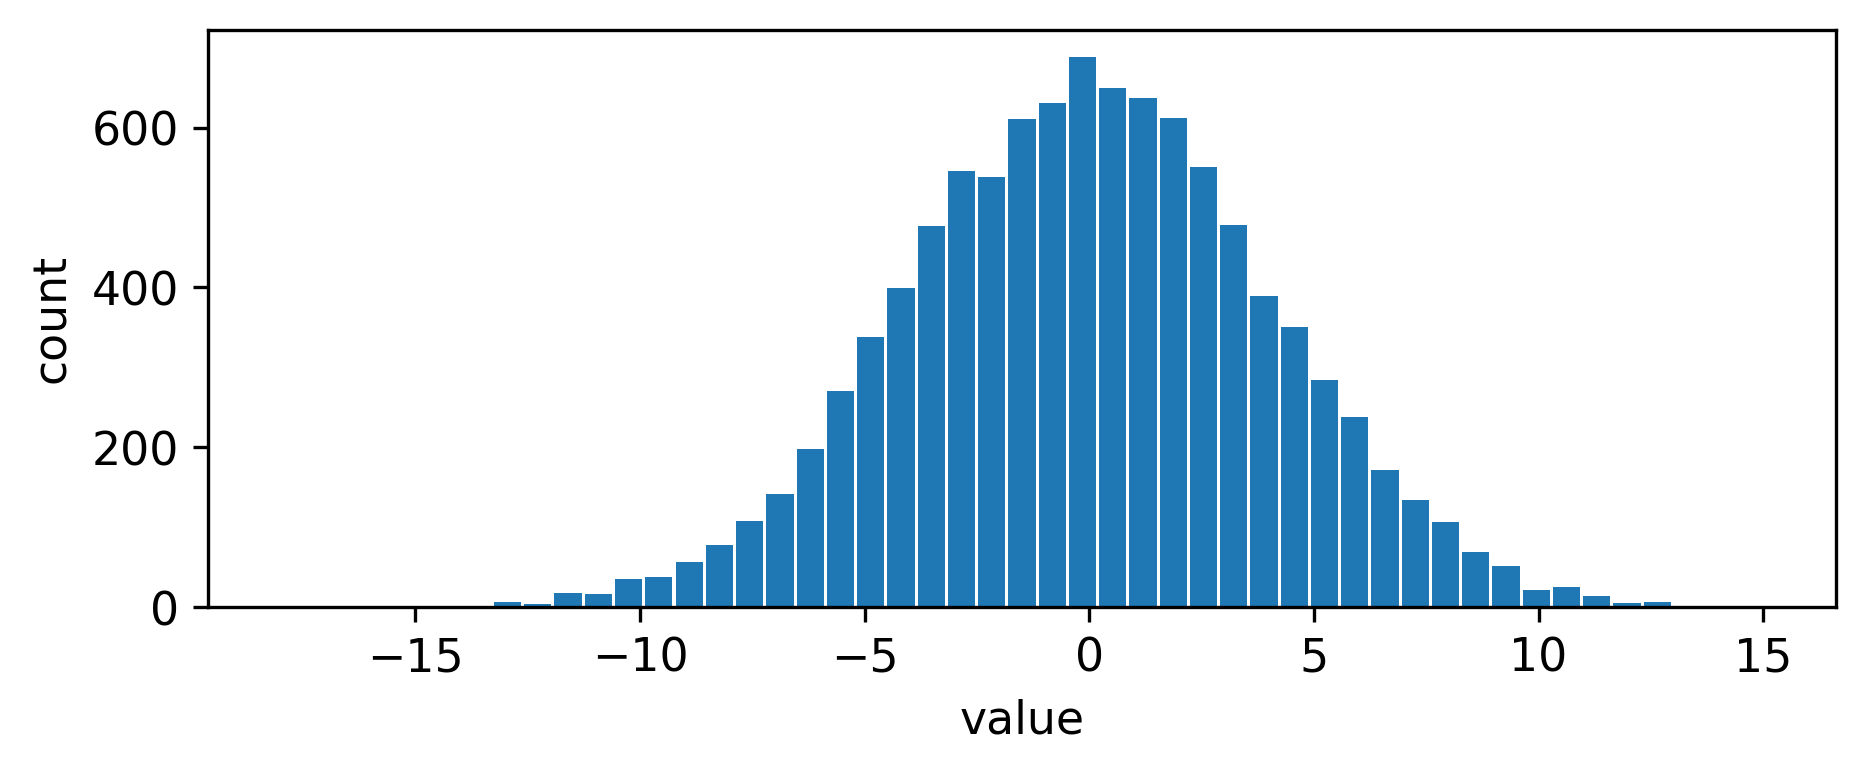

In [192]:
bins = np.linspace(-18, 15, 50)
hist, edges = np.histogram(X, bins = bins)
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots()
ax.bar(x, hist, width = width *0.9)
ax.set_xlabel('value')
ax.set_ylabel('count')

### 3.-5. Cumulative average and median

In [193]:
#Two possible approaches: #1 with df and #2 with np.array
#1 df approach
df = pd.DataFrame(X, columns = ['value'])
df = df.expanding().mean()

In [194]:
#2 np.array approach
i = np.linspace(1, X.size, X.size)
X_cum_avg = X.cumsum()/i
X_cum_avg

array([-8.44800665, -0.80966847, -1.58136475, ..., -0.01522974,
       -0.01579422, -0.01582303])

In [195]:
#cumulative standard deviation
X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
#X_cum_std

In [196]:
print(X.mean())
print(np.median(X))

-0.01582303083218534
0.001461200764136197


### 6.-8. Plot cumulative average and median

Text(0, 0.5, 'Cumulative mean')

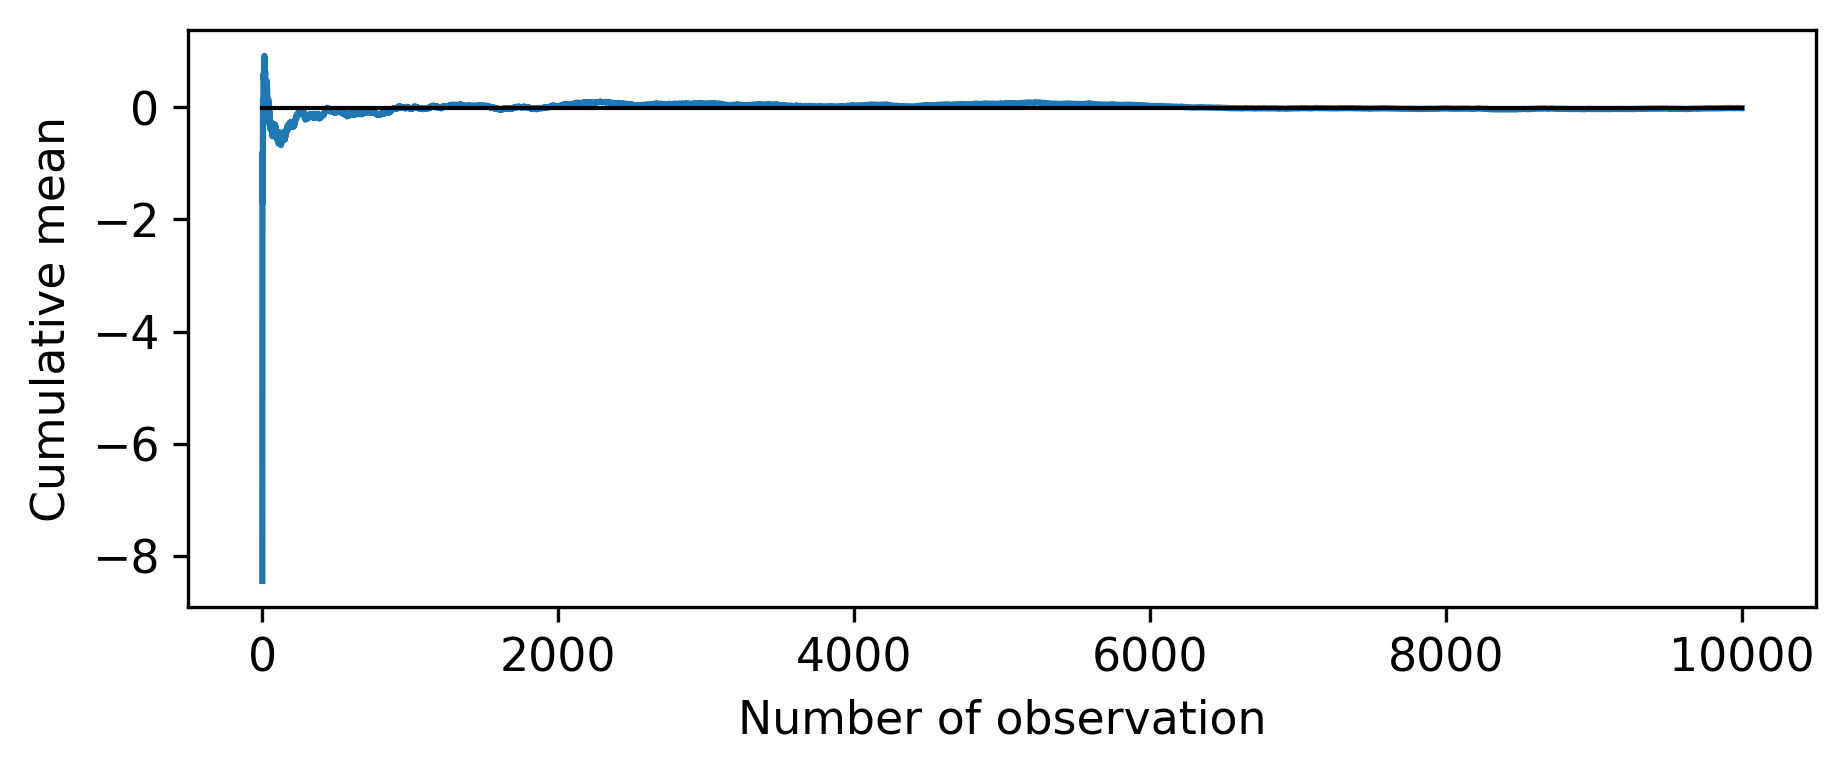

In [197]:
#6. Plot
plt.plot(X_cum_avg)
plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1)
#plt.errorbar(x=np.linspace(1, X.size, X.size), y=X_cum_avg, yerr=X_cum_std)
plt.xlabel("Number of observation")
plt.ylabel("Cumulative mean")

In [198]:
#cumulative median
X_cum_median =[np.median(X[:element]) for element in range(1,len(X)+1)]
#X_cum_median

Text(0, 0.5, 'Cumulative median')

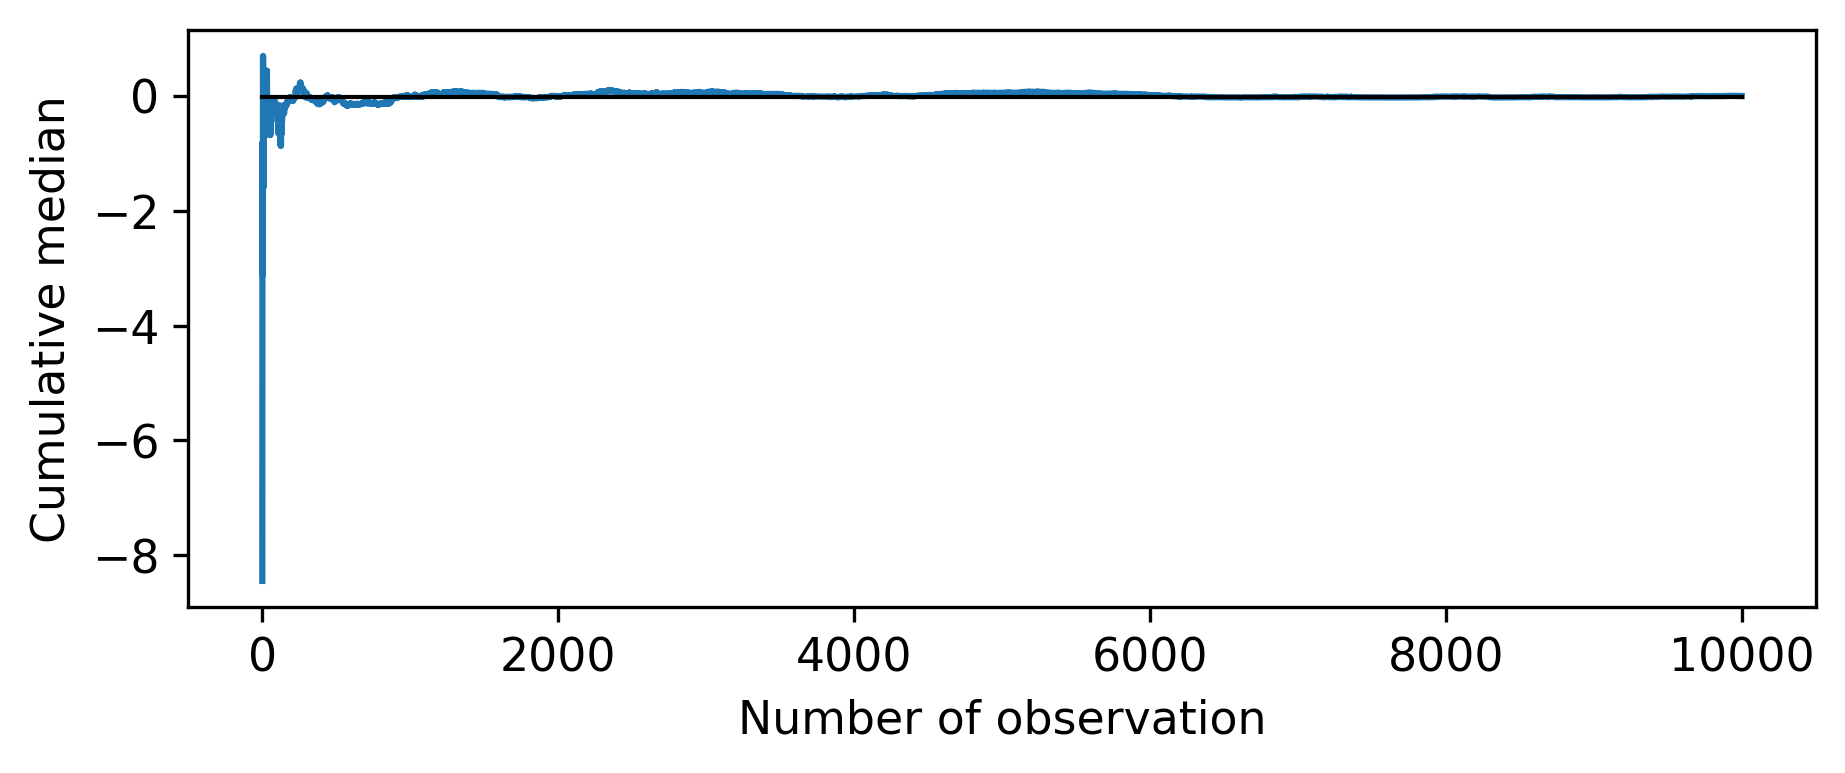

In [199]:
#8. Plot
plt.plot(X_cum_median)
plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1)
#plt.errorbar(x=np.linspace(1, X.size, X.size), y=X_cum_avg, yerr=X_cum_std)
plt.xlabel("Number of observation")
plt.ylabel("Cumulative median")

### 9.-12. Create plots for the Pareto and Log-Normal distribution

In [209]:
import math

def exercise3_GPT(X, x_log, y_log, bar_hist):
#pass array X and x_log and y_log boolean. bar_hist specifies whether the histogram is a bar plot (True) or a line plot (False)
    
    # 1. Create histogram
    bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), 50)
    if x_log:
        bins = np.logspace(0, np.log10(math.ceil(max(X))), 50)
    hist, edges = np.histogram(X, bins = bins, density = True)
    x = (edges[1:]+edges[:-1])/2
    width = bins[1]-bins[0]

    fig, ax = plt.subplots()
    if bar_hist:
        ax.bar(x, hist, width = width *0.9)
    else:
        ax.plot(x, hist, marker = '.')

    ax.set_xlabel('value')
    ax.set_ylabel('Probability distribution')
    if x_log:
        ax.set_xscale('log')
    if y_log:
        ax.set_yscale('log')   

        
        
    #calculate cumulative mean                       
    i = np.linspace(1, X.size, X.size)
    X_cum_avg = X.cumsum()/i
    
    
    #calculate cumulative standard deviation (this might not be needed actually but to time to double-check)
    X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
    
    
    #calculate cumulative standard deviation
    X_cum_median =[np.median(X[:element]) for element in range(1,len(X)+1)]
    
    print('mean:' + str(X.mean()))
    print('median:' + str(np.median(X)))
    
    #6. Plot cumulative mean
    plt.figure()
    plt.plot(X_cum_avg)
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    #plt.errorbar(x=np.linspace(1, X.size, X.size), y=X_cum_avg, yerr=X_cum_std)
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative mean")
        
    #8. Plot cumulative median
    plt.figure()
    plt.plot(X_cum_median)
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    #plt.errorbar(x=np.linspace(1, X.size, X.size), y=X_cum_avg, yerr=X_cum_std)
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative median")

#### Check again for Normal/Gaussion distribution

mean:-0.02666609561230082
median:0.003876527739235307


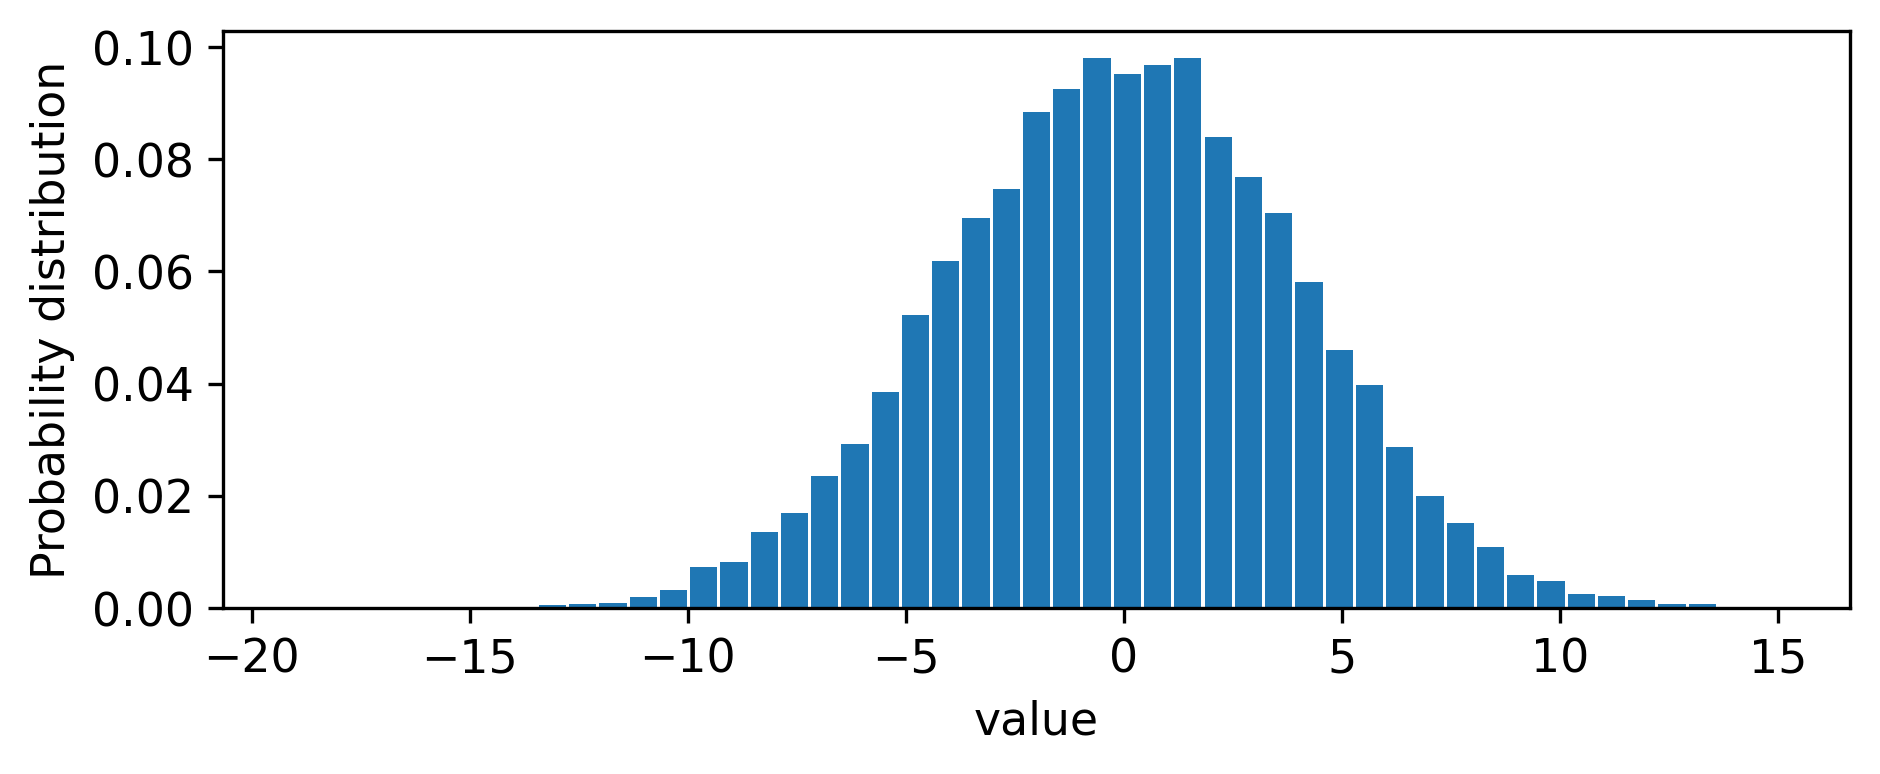

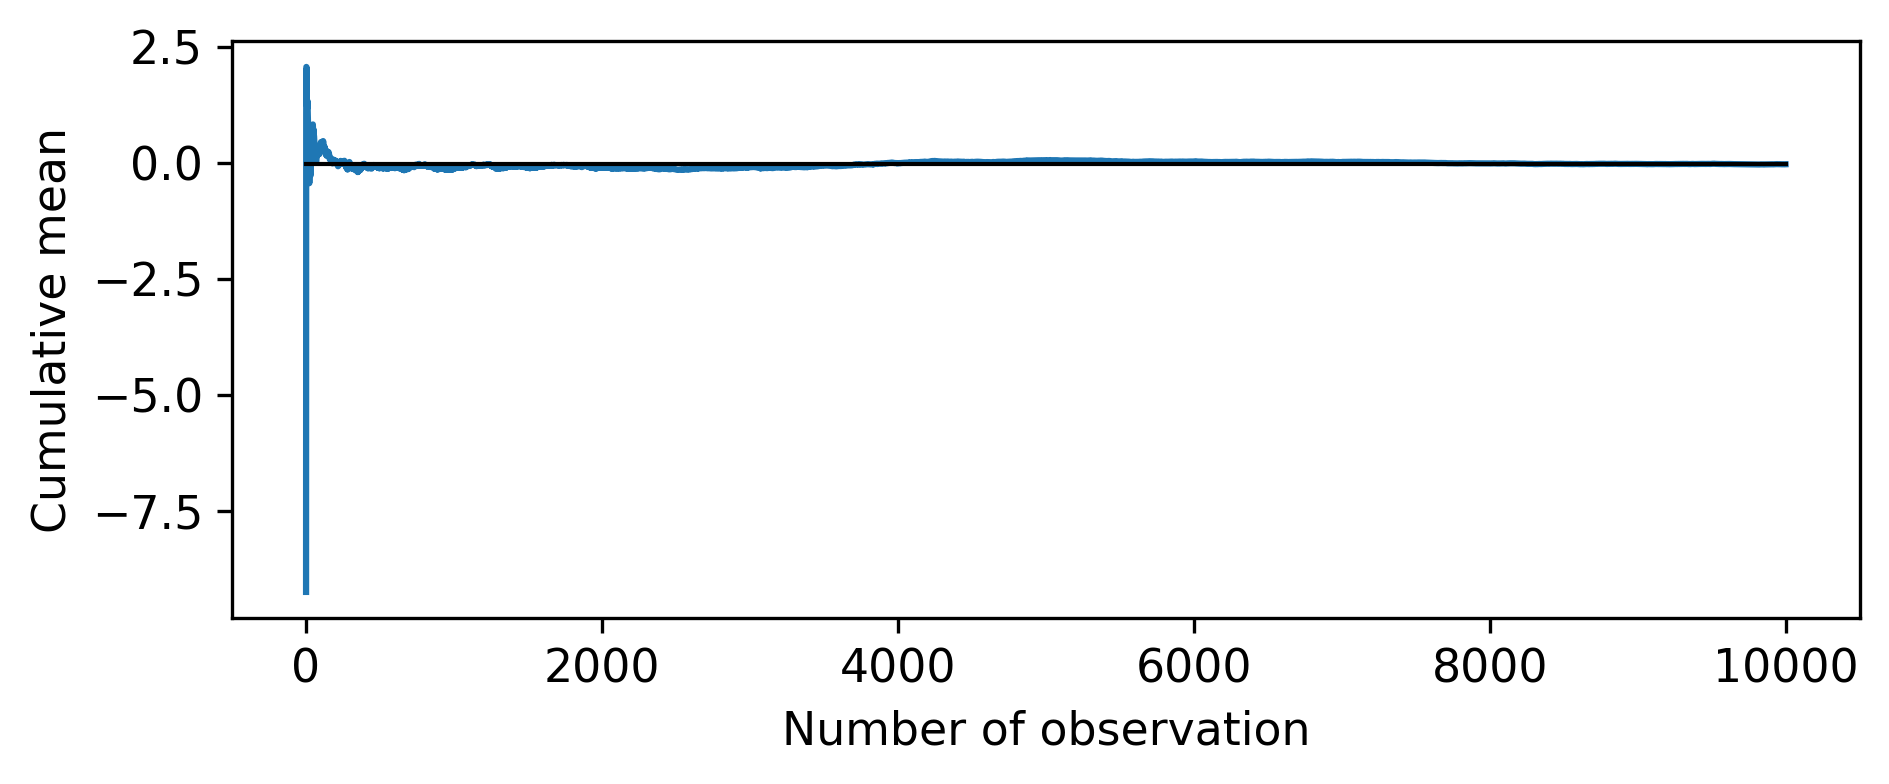

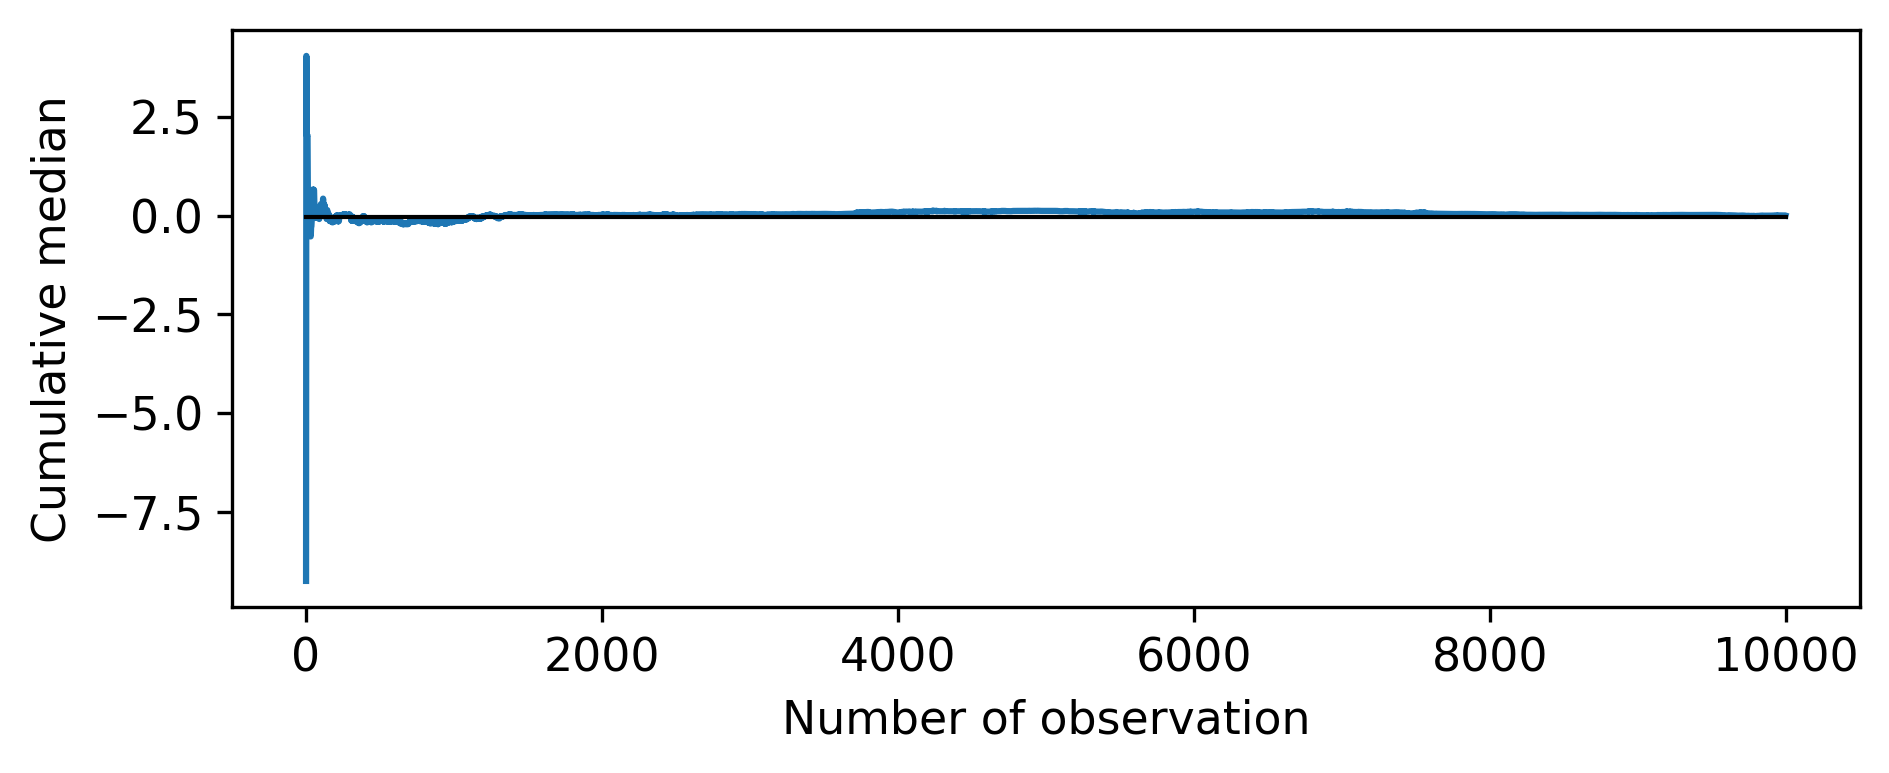

In [210]:
exercise3_GPT(X, x_log = False, y_log = False, bar_hist = True)

#### Pareto distribution

In [215]:
a, m = 0.5, 1  # shape and mode
X_pareto = (np.random.pareto(a, 1000) + 1) * m
#X_pareto

mean:7872.337139872762
median:3.6821416126943944


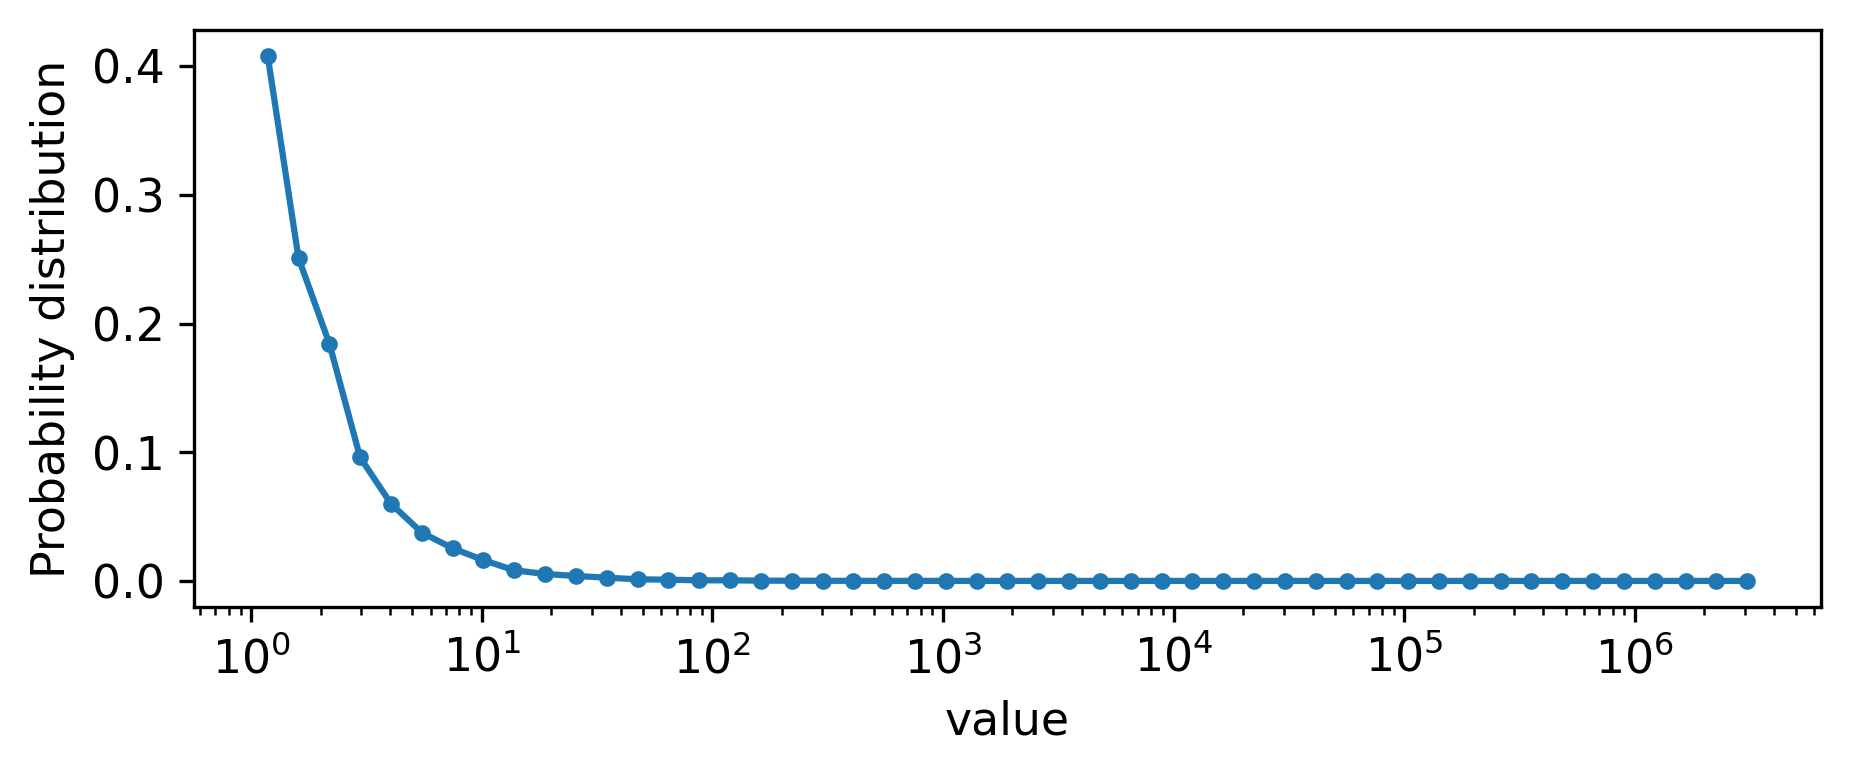

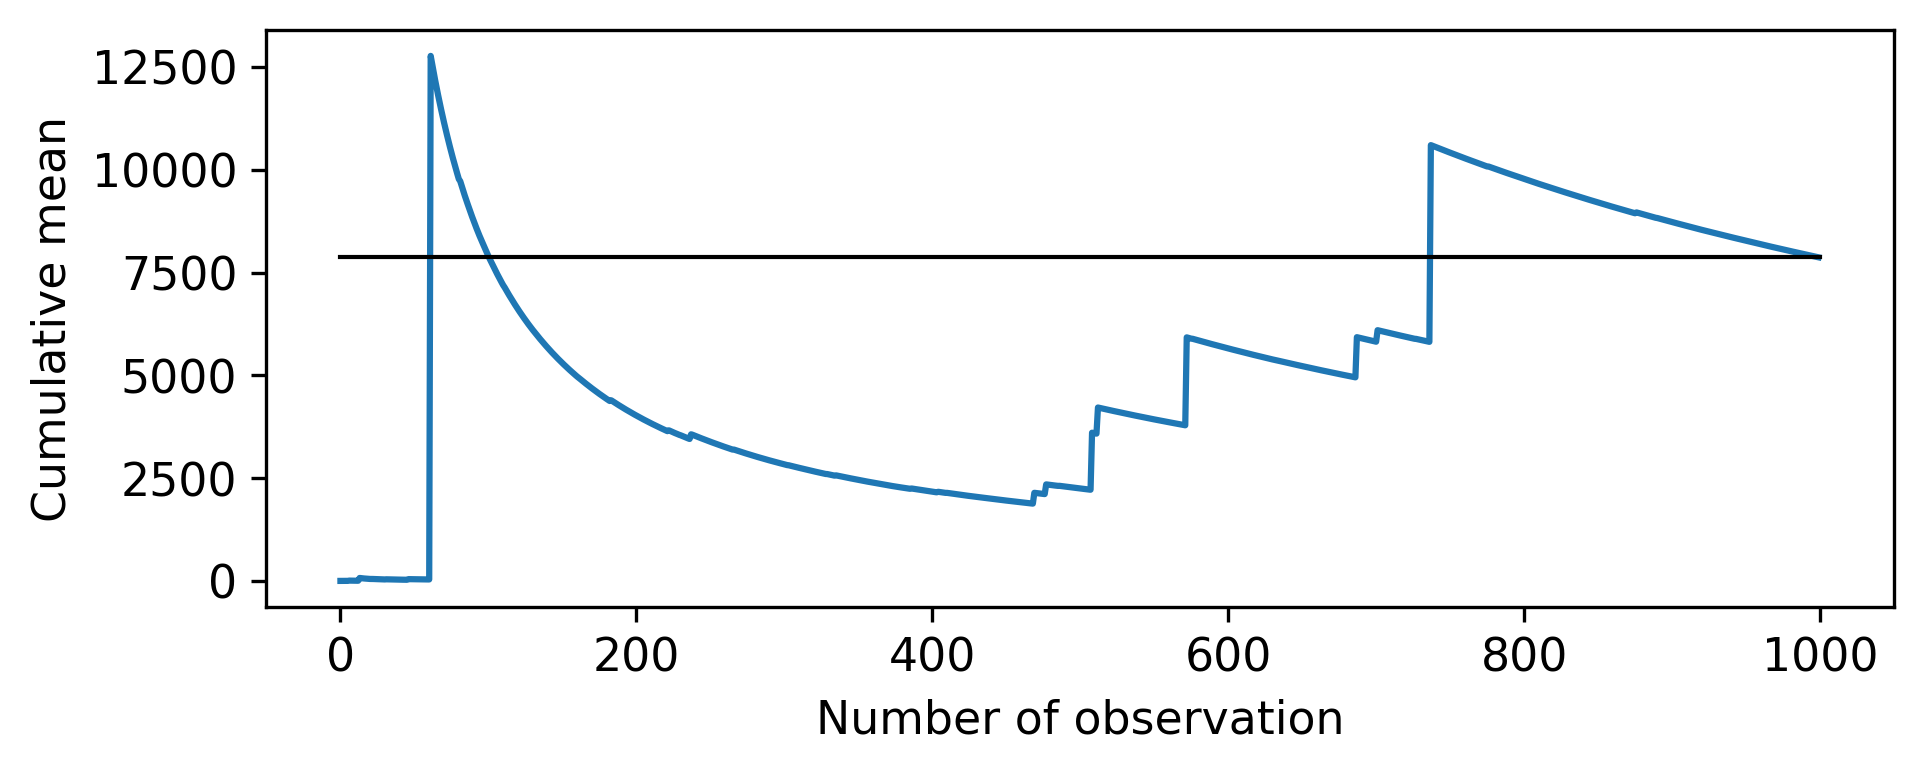

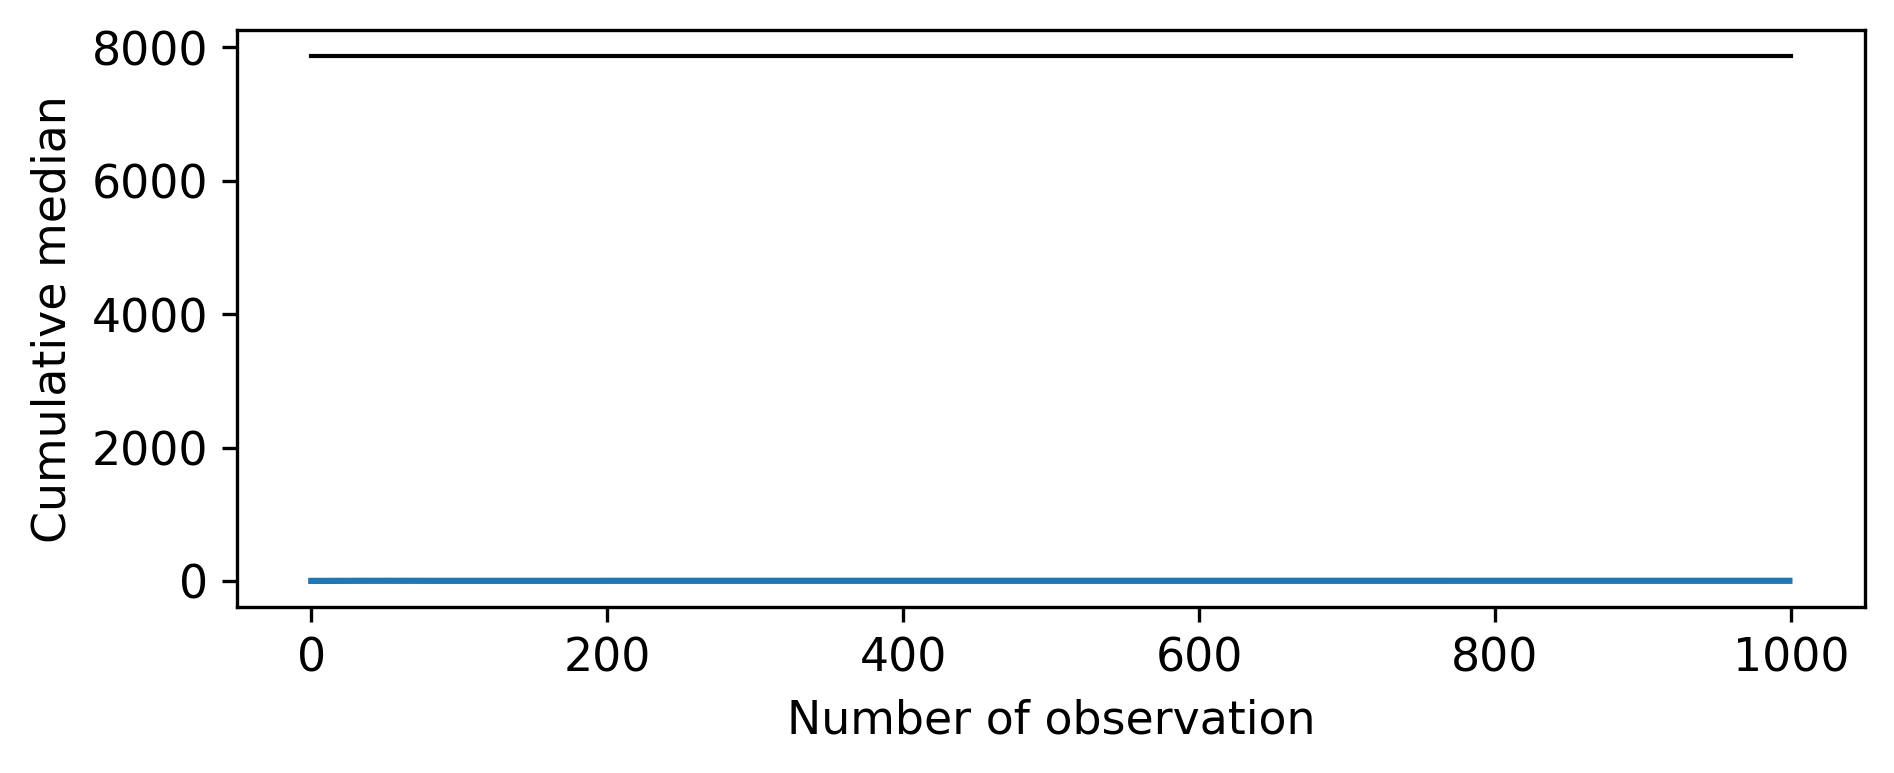

In [216]:
exercise3_GPT(X_pareto, x_log = True, y_log = False, bar_hist = False)

#### Log-Normal distribution

mean:2658.3900885873977
median:0.9531329350879254


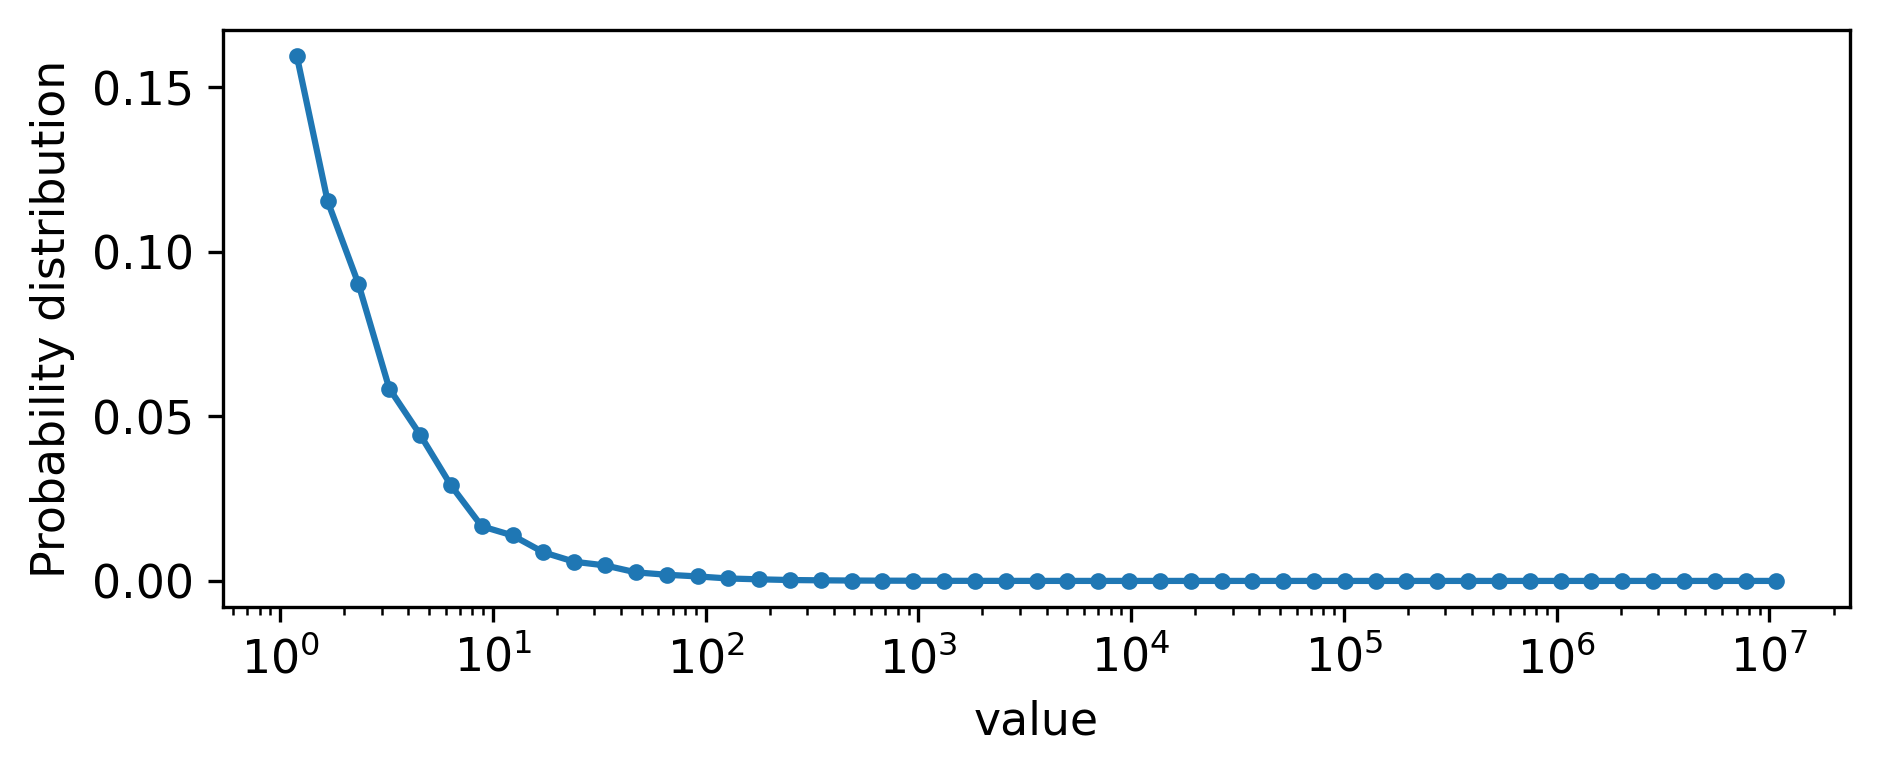

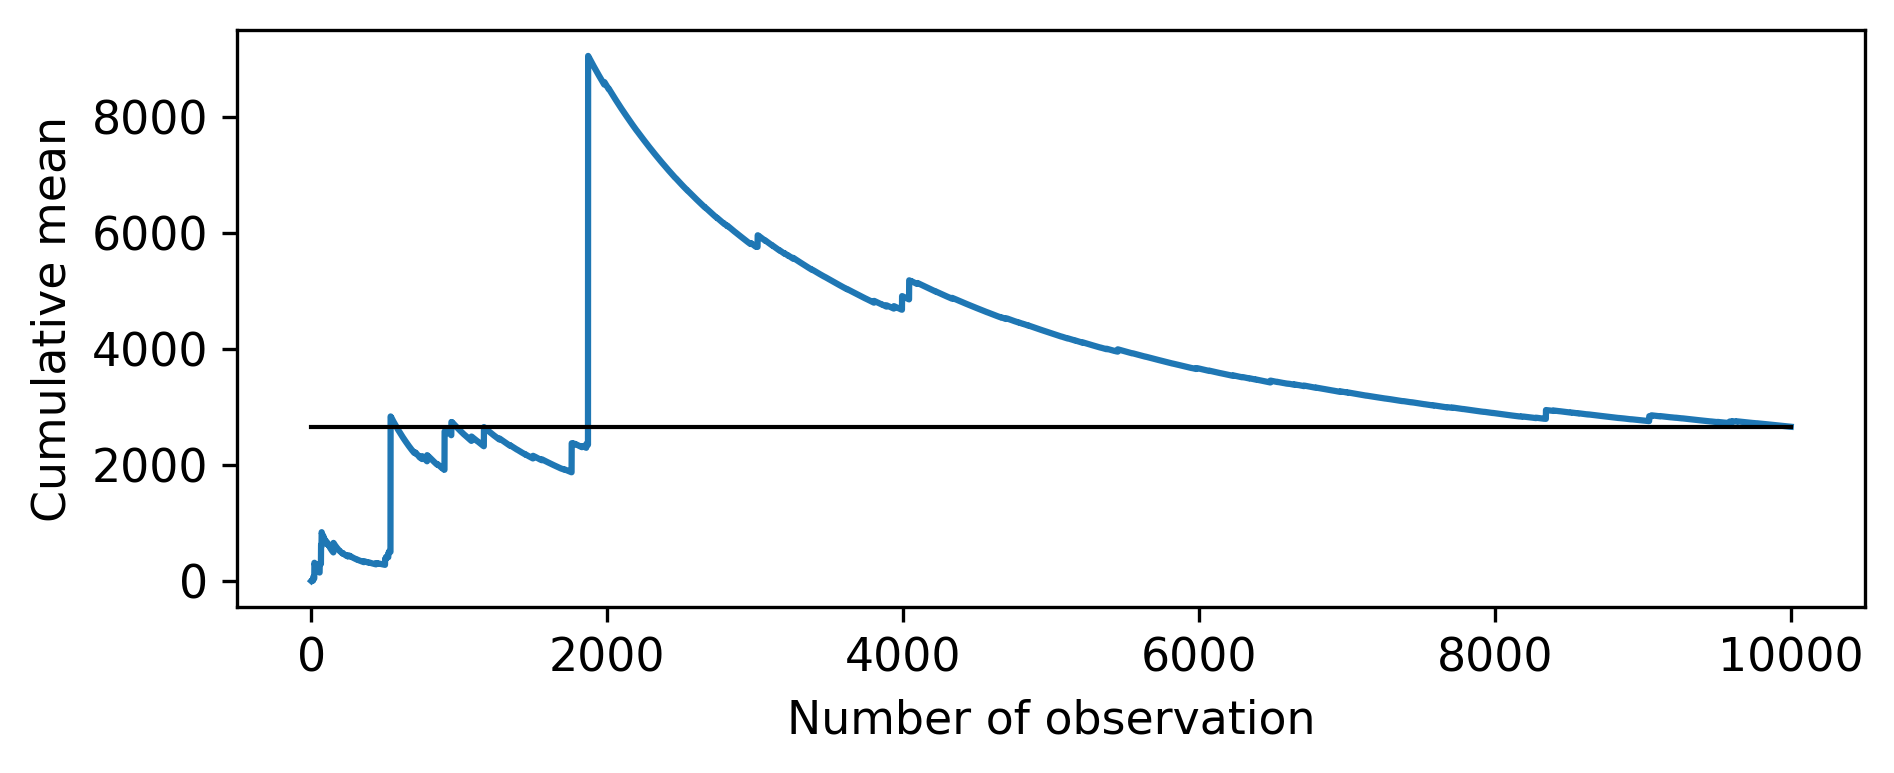

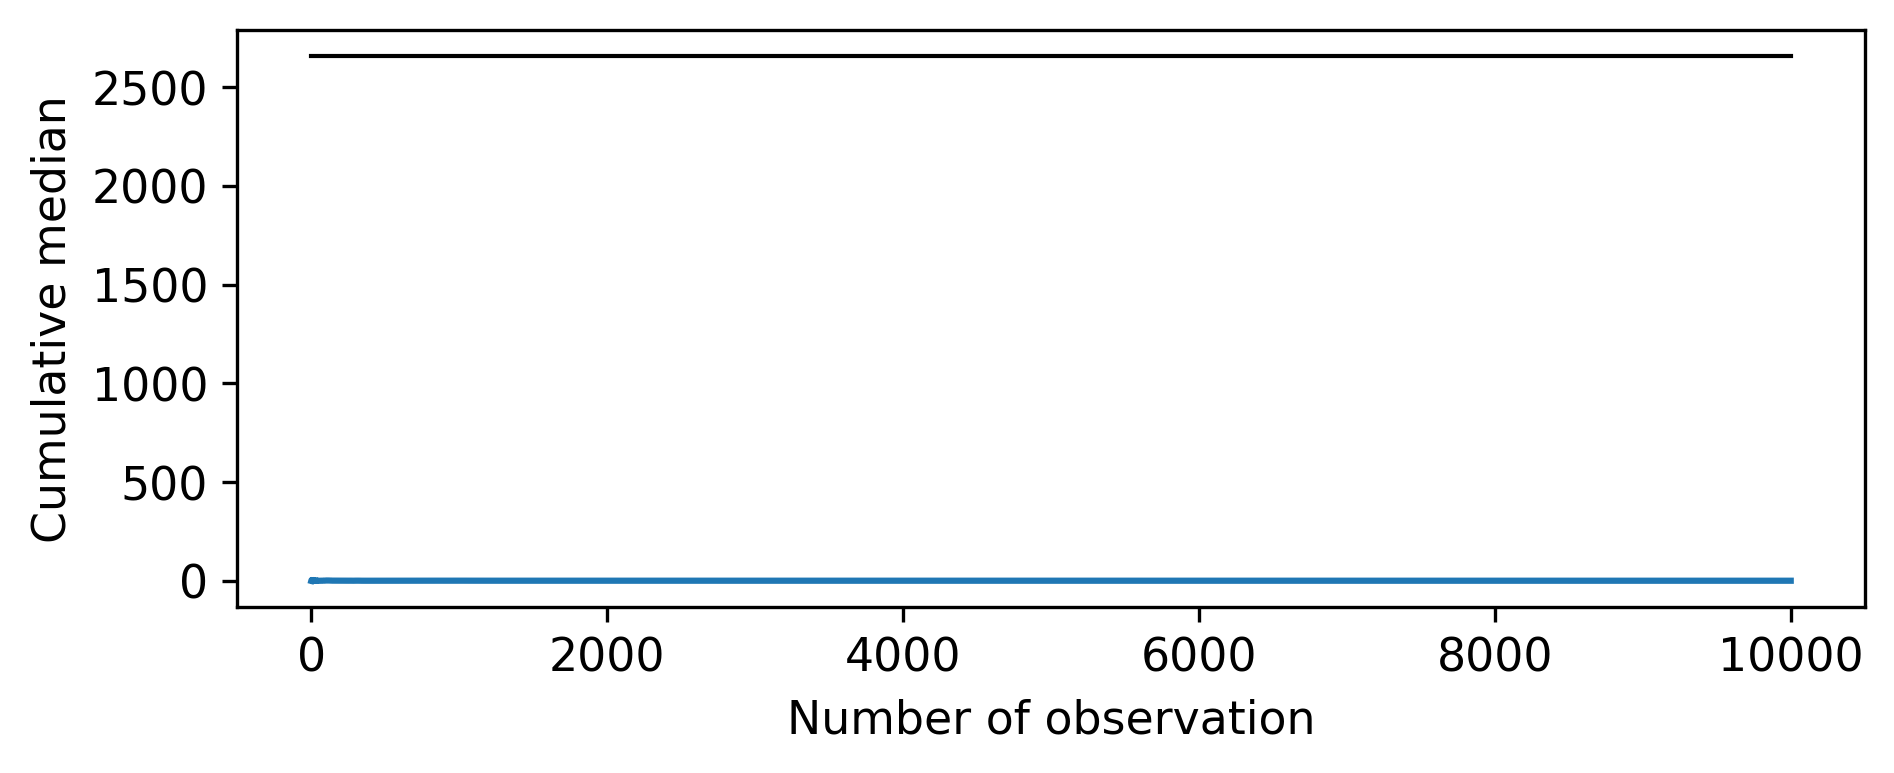

In [217]:
mu, sigma = 0, 4 # mean and standard deviation
X_logNorm = np.random.lognormal(mu, sigma, 10000)
#X_logNorm
exercise3_GPT(X_logNorm, x_log = True, y_log = False, bar_hist = False)

# Exercise 4

### 1.-3. 

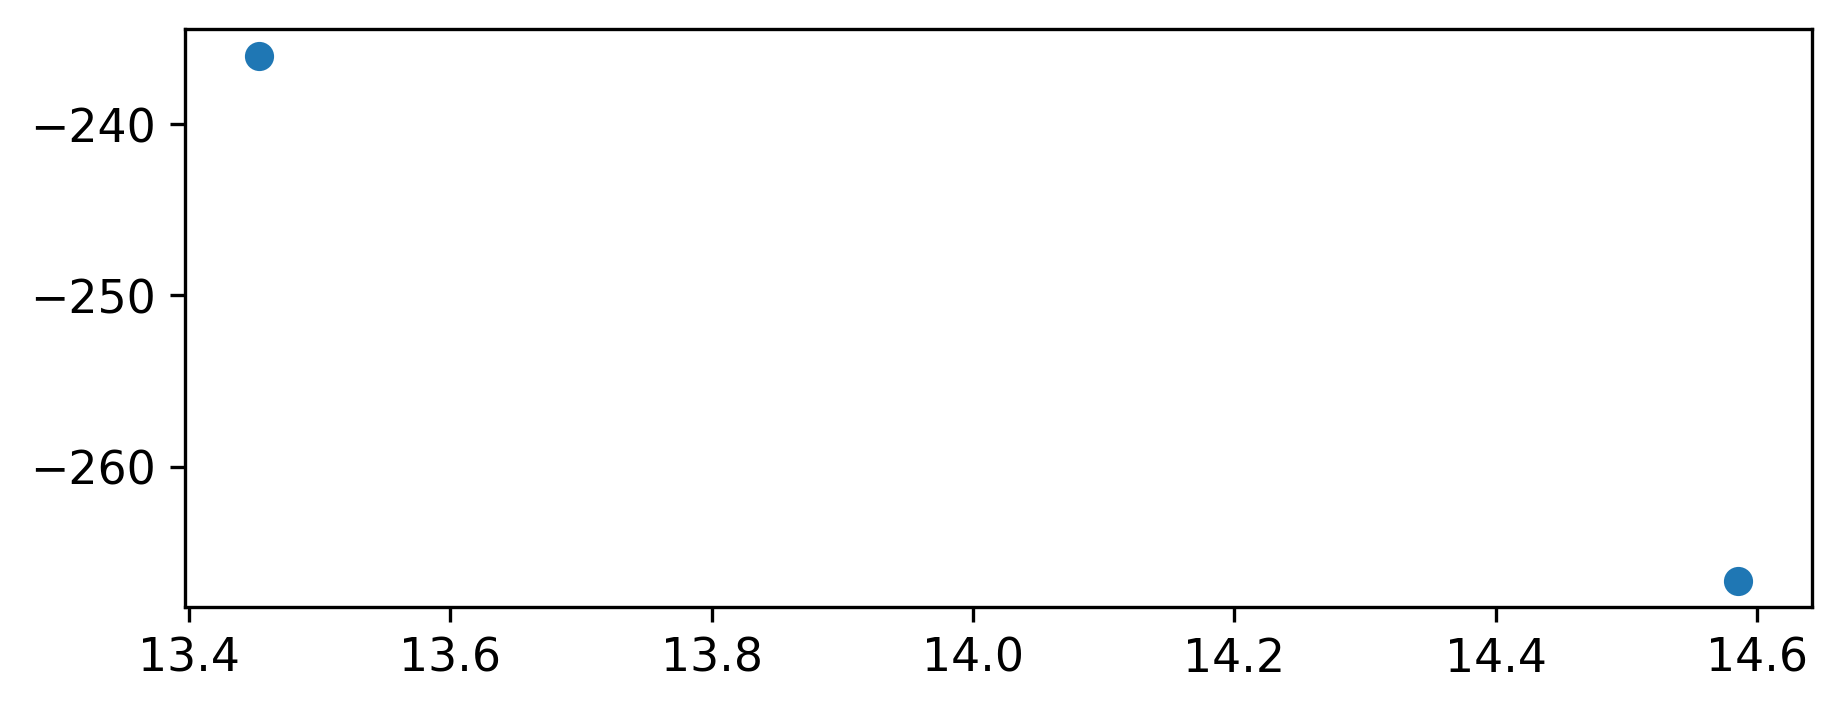

In [205]:
mu, sigma = 0, 4 # mean and standard deviation
X = np.random.normal(mu, sigma, 10000)


X_1k = np.random.normal(mu, sigma, 1000)

normal_max = [max(X), max(X_1k)]
normal_sum = [sum(X), sum(X_1k)]

plt.scatter(normal_max, normal_sum)


### 4. Scatter plot of sum vs. max of distribution

##### I interpreted this exercise as in doing the sum and max up to element n for each element. So basically, what is the max and sum if we look at the first 1:n samples.

Text(0.5, 1.0, 'Normal distribution')

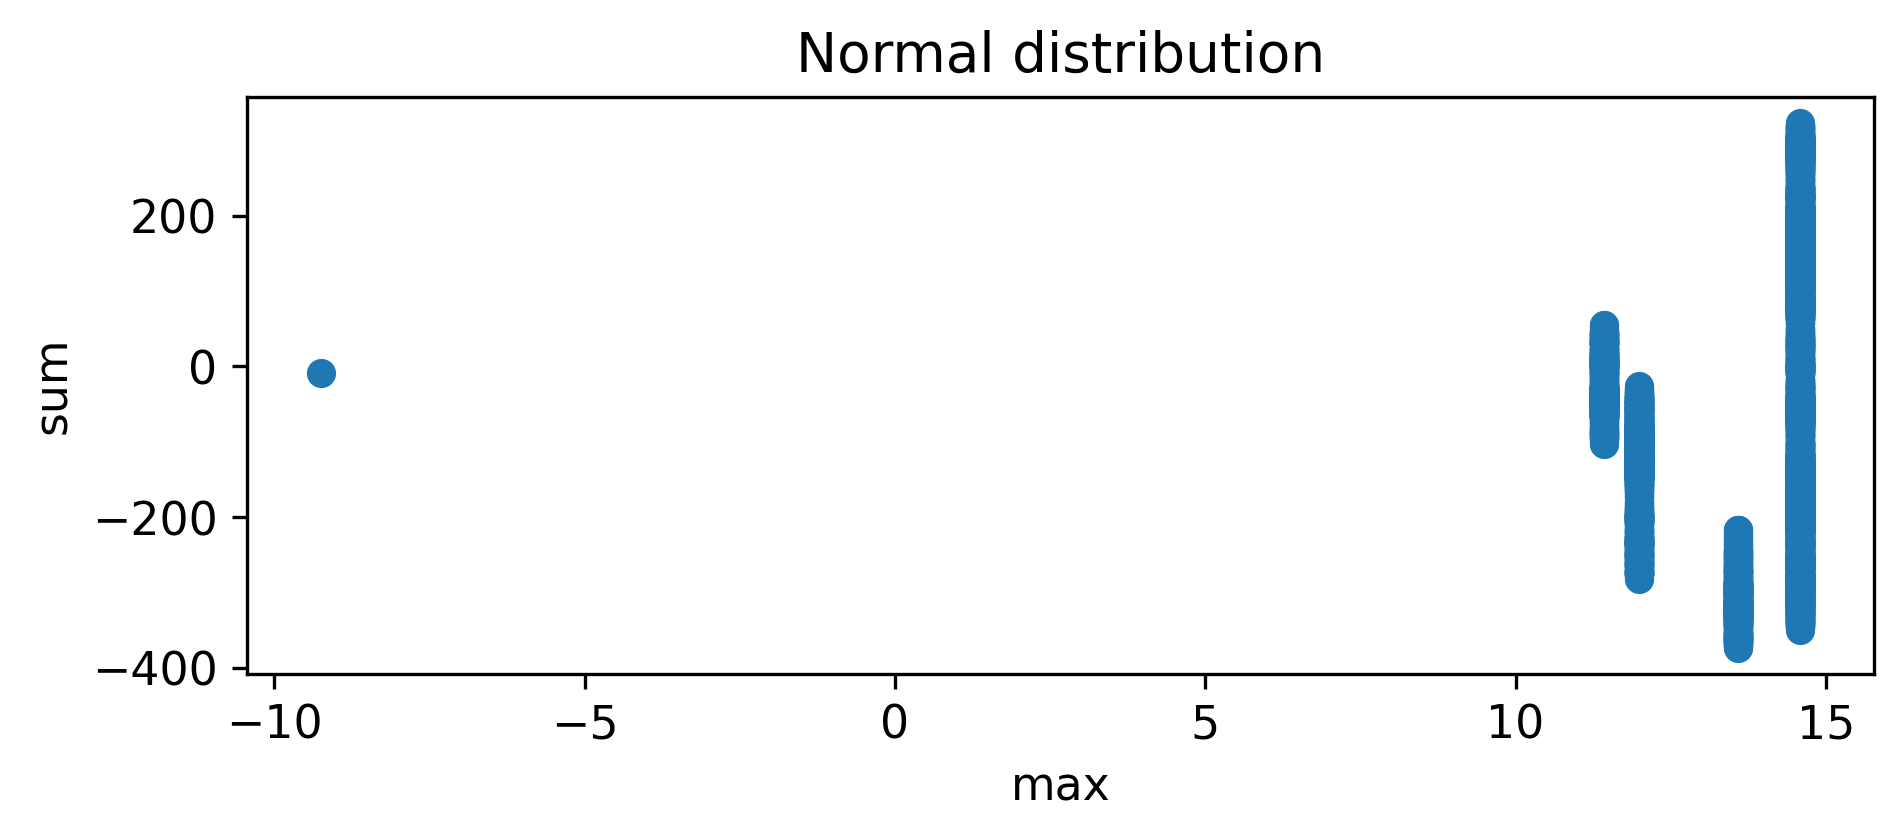

In [206]:
def plot_scatter_ex4(X):
    X_cum_max =[max(X[:element]) for element in range(1,len(X)+1)]
    X_cum_sum =[sum(X[:element]) for element in range(1,len(X)+1)]
    plt.scatter(X_cum_max, X_cum_sum)
    plt.xlabel("max")
    plt.ylabel("sum")
    
plot_scatter_ex4(X)
plt.title('Normal distribution')

Text(0.5, 1.0, 'Pareto distribution')

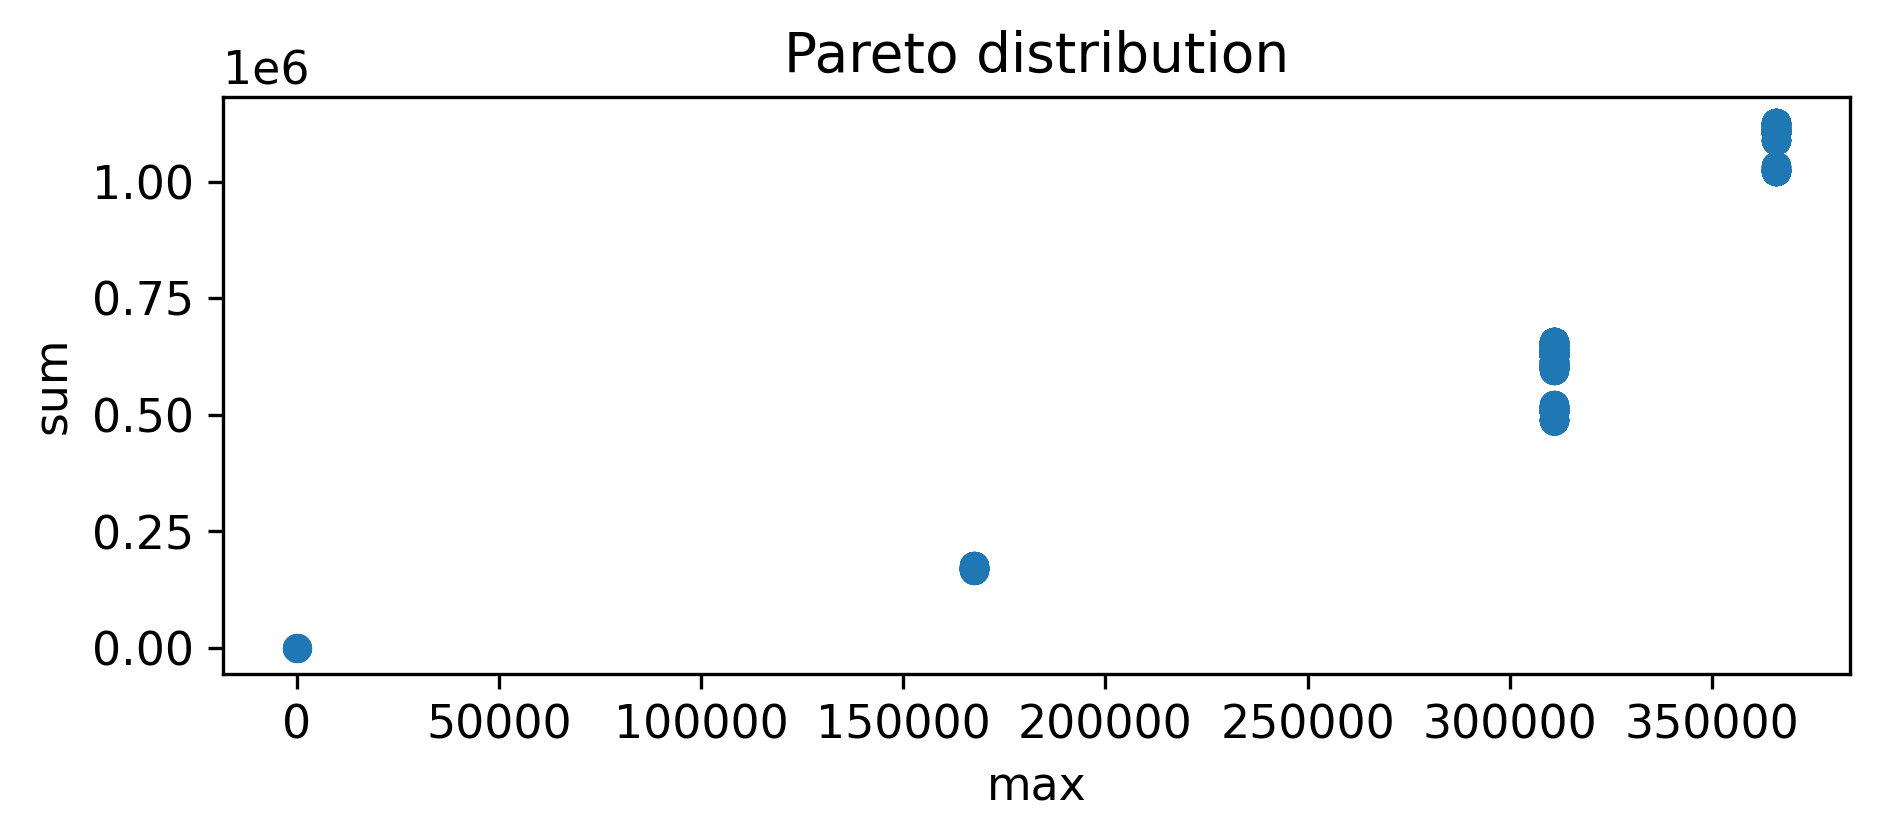

In [207]:
a, m = 0.5, 1  # shape and mode
X_pareto = (np.random.pareto(a, 1000) + 1) * m

plot_scatter_ex4(X_pareto)
plt.title('Pareto distribution')

Text(0.5, 1.0, 'Log-Normal distribution')

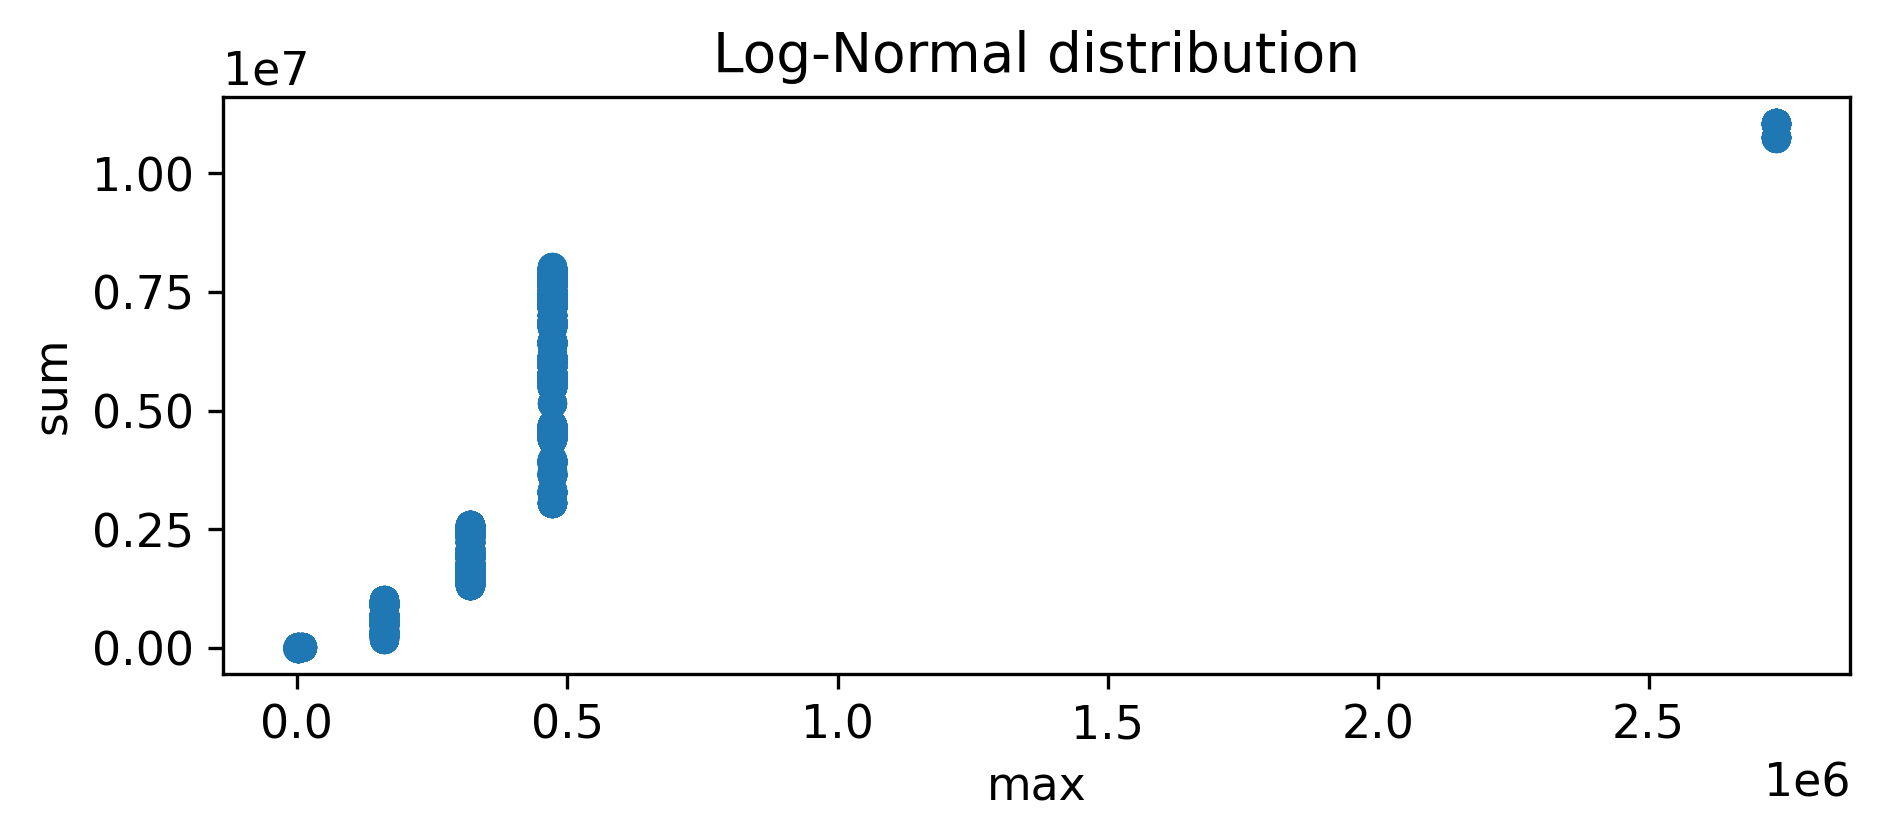

In [208]:
mu, sigma = 0, 4 # mean and standard deviation
X_logNorm = np.random.lognormal(mu, sigma, 10000)
plot_scatter_ex4(X_logNorm)
plt.title('Log-Normal distribution')